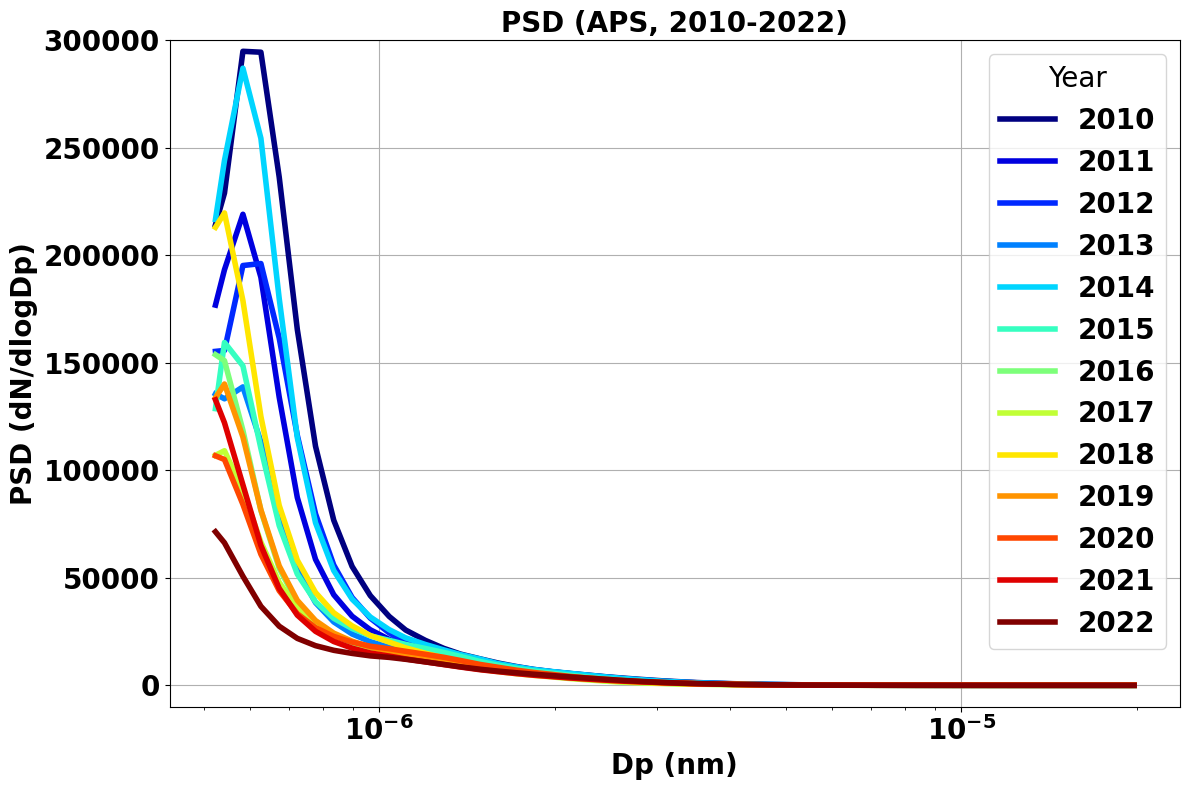

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2012 to 2022
    data = data[data['Date'].dt.year.between(2010, 2022)]
    years = sorted(data['Date'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year
    for year, color in zip(years, colors):
        yearly_data = data[data['Date'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        sum_psd = yearly_data.iloc[:, 1:].sum()
        
        ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('PSD (APS, 2010-2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx'
y_min = -10000  # Set minimum y-axis value
y_max = 300000  # Set maximum y-axis value
plot_psd_by_years(file_path, y_min, y_max)

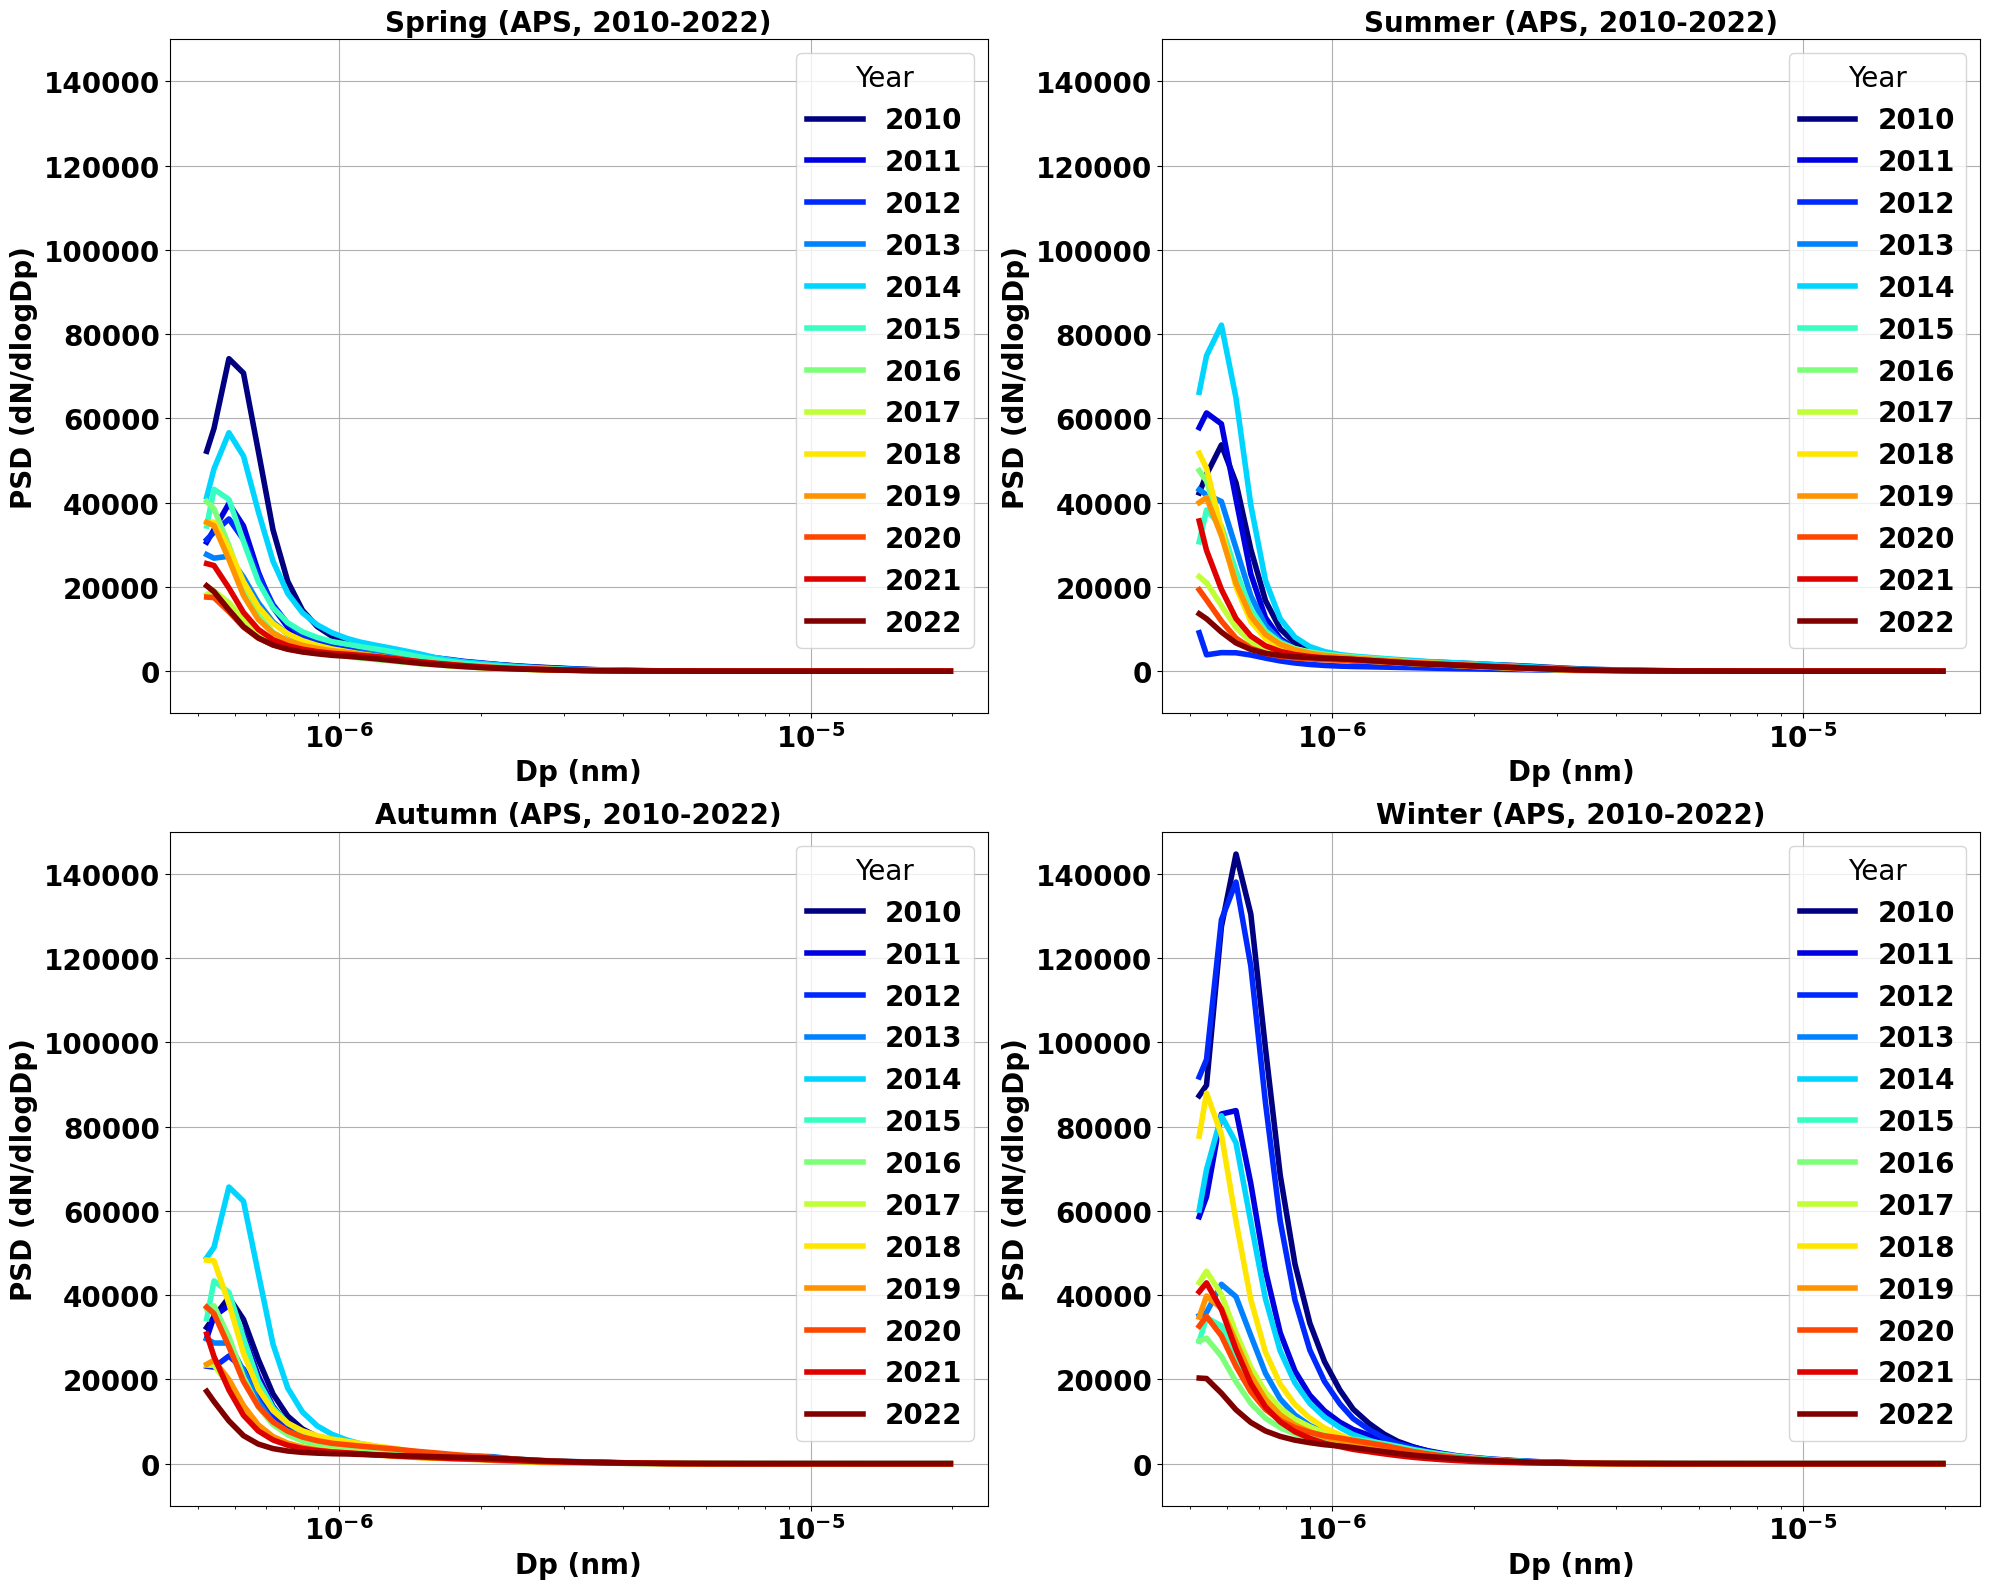

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_sum_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['Date'].dt.month.isin(months) & data['Date'].dt.year.between(2010, 2022)]
        years = sorted(season_data['Date'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['Date'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            sum_psd = yearly_data.iloc[:, 1:].sum()

            ax = axes[i]
            # Increase linewidth here
            ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))
            ax.set_title(f'{season} (APS, 2010-2022)', fontsize=20, weight='bold')
            ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
            ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
            ax.set_ylim(y_min, y_max)  # Set custom y-axis limits based on parameters
            ax.grid(True)
            legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
            for text in legend.get_texts():
                text.set_weight('bold')

            # Adjusting the tick labels and exponent notation
            ax.tick_params(axis='both', which='major', labelsize=20)
            for label in ax.get_xticklabels() + ax.get_yticklabels():
                label.set_fontweight('bold')

            # Set the offset text (for scientific notation) to be bold and size 20
            ax.xaxis.get_offset_text().set_fontsize(20)
            ax.xaxis.get_offset_text().set_weight('bold')
            ax.yaxis.get_offset_text().set_fontsize(20)
            ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/APS Hourly Avg (2010-2022).xlsx'
y_min = -10000  # Set minimum y-axis value
y_max = 150000  # Set maximum y-axis value
plot_sum_psd_by_season(file_path, y_min, y_max)

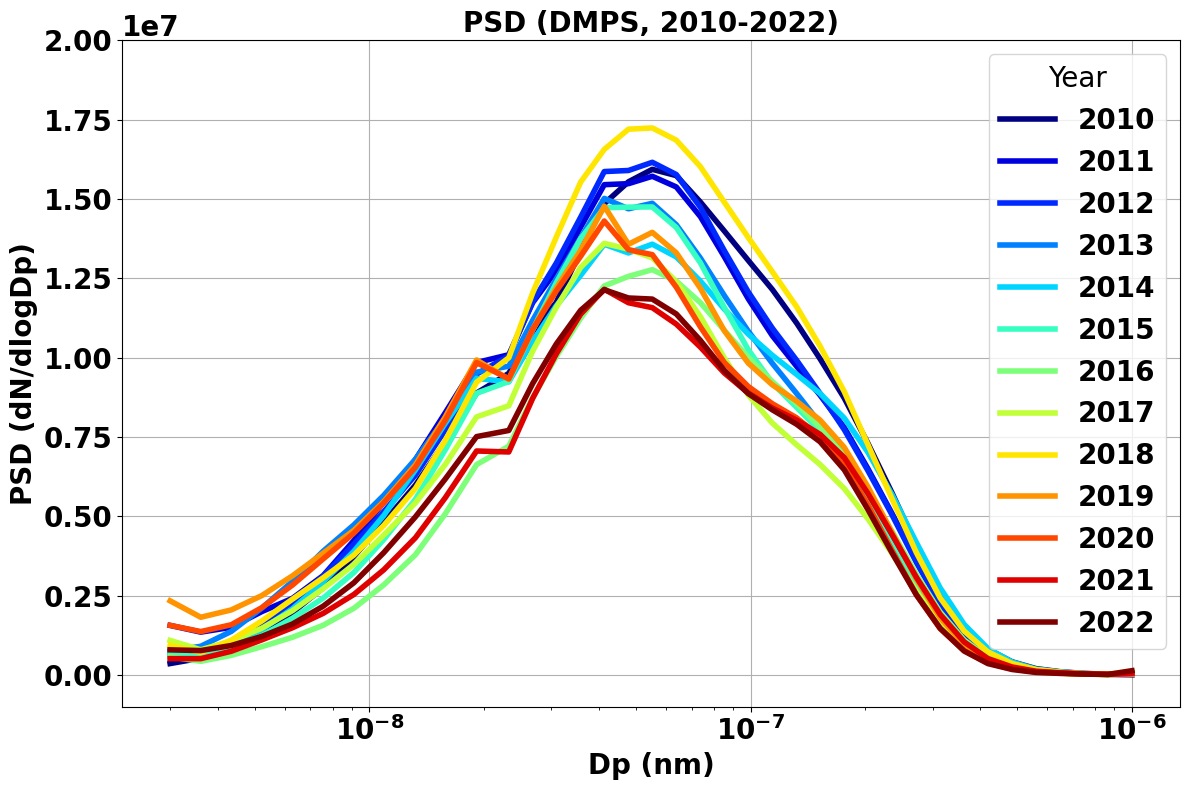

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['Date'].dt.year.between(2010, 2022)]
    years = sorted(data['Date'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year
    for year, color in zip(years, colors):
        yearly_data = data[data['Date'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        sum_psd = yearly_data.iloc[:, 1:].sum()
        
        ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('PSD (DMPS, 2010-2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx'
y_min = -1000000  # Set minimum y-axis value
y_max = 20000000  # Set maximum y-axis value
plot_psd_by_years(file_path, y_min, y_max)

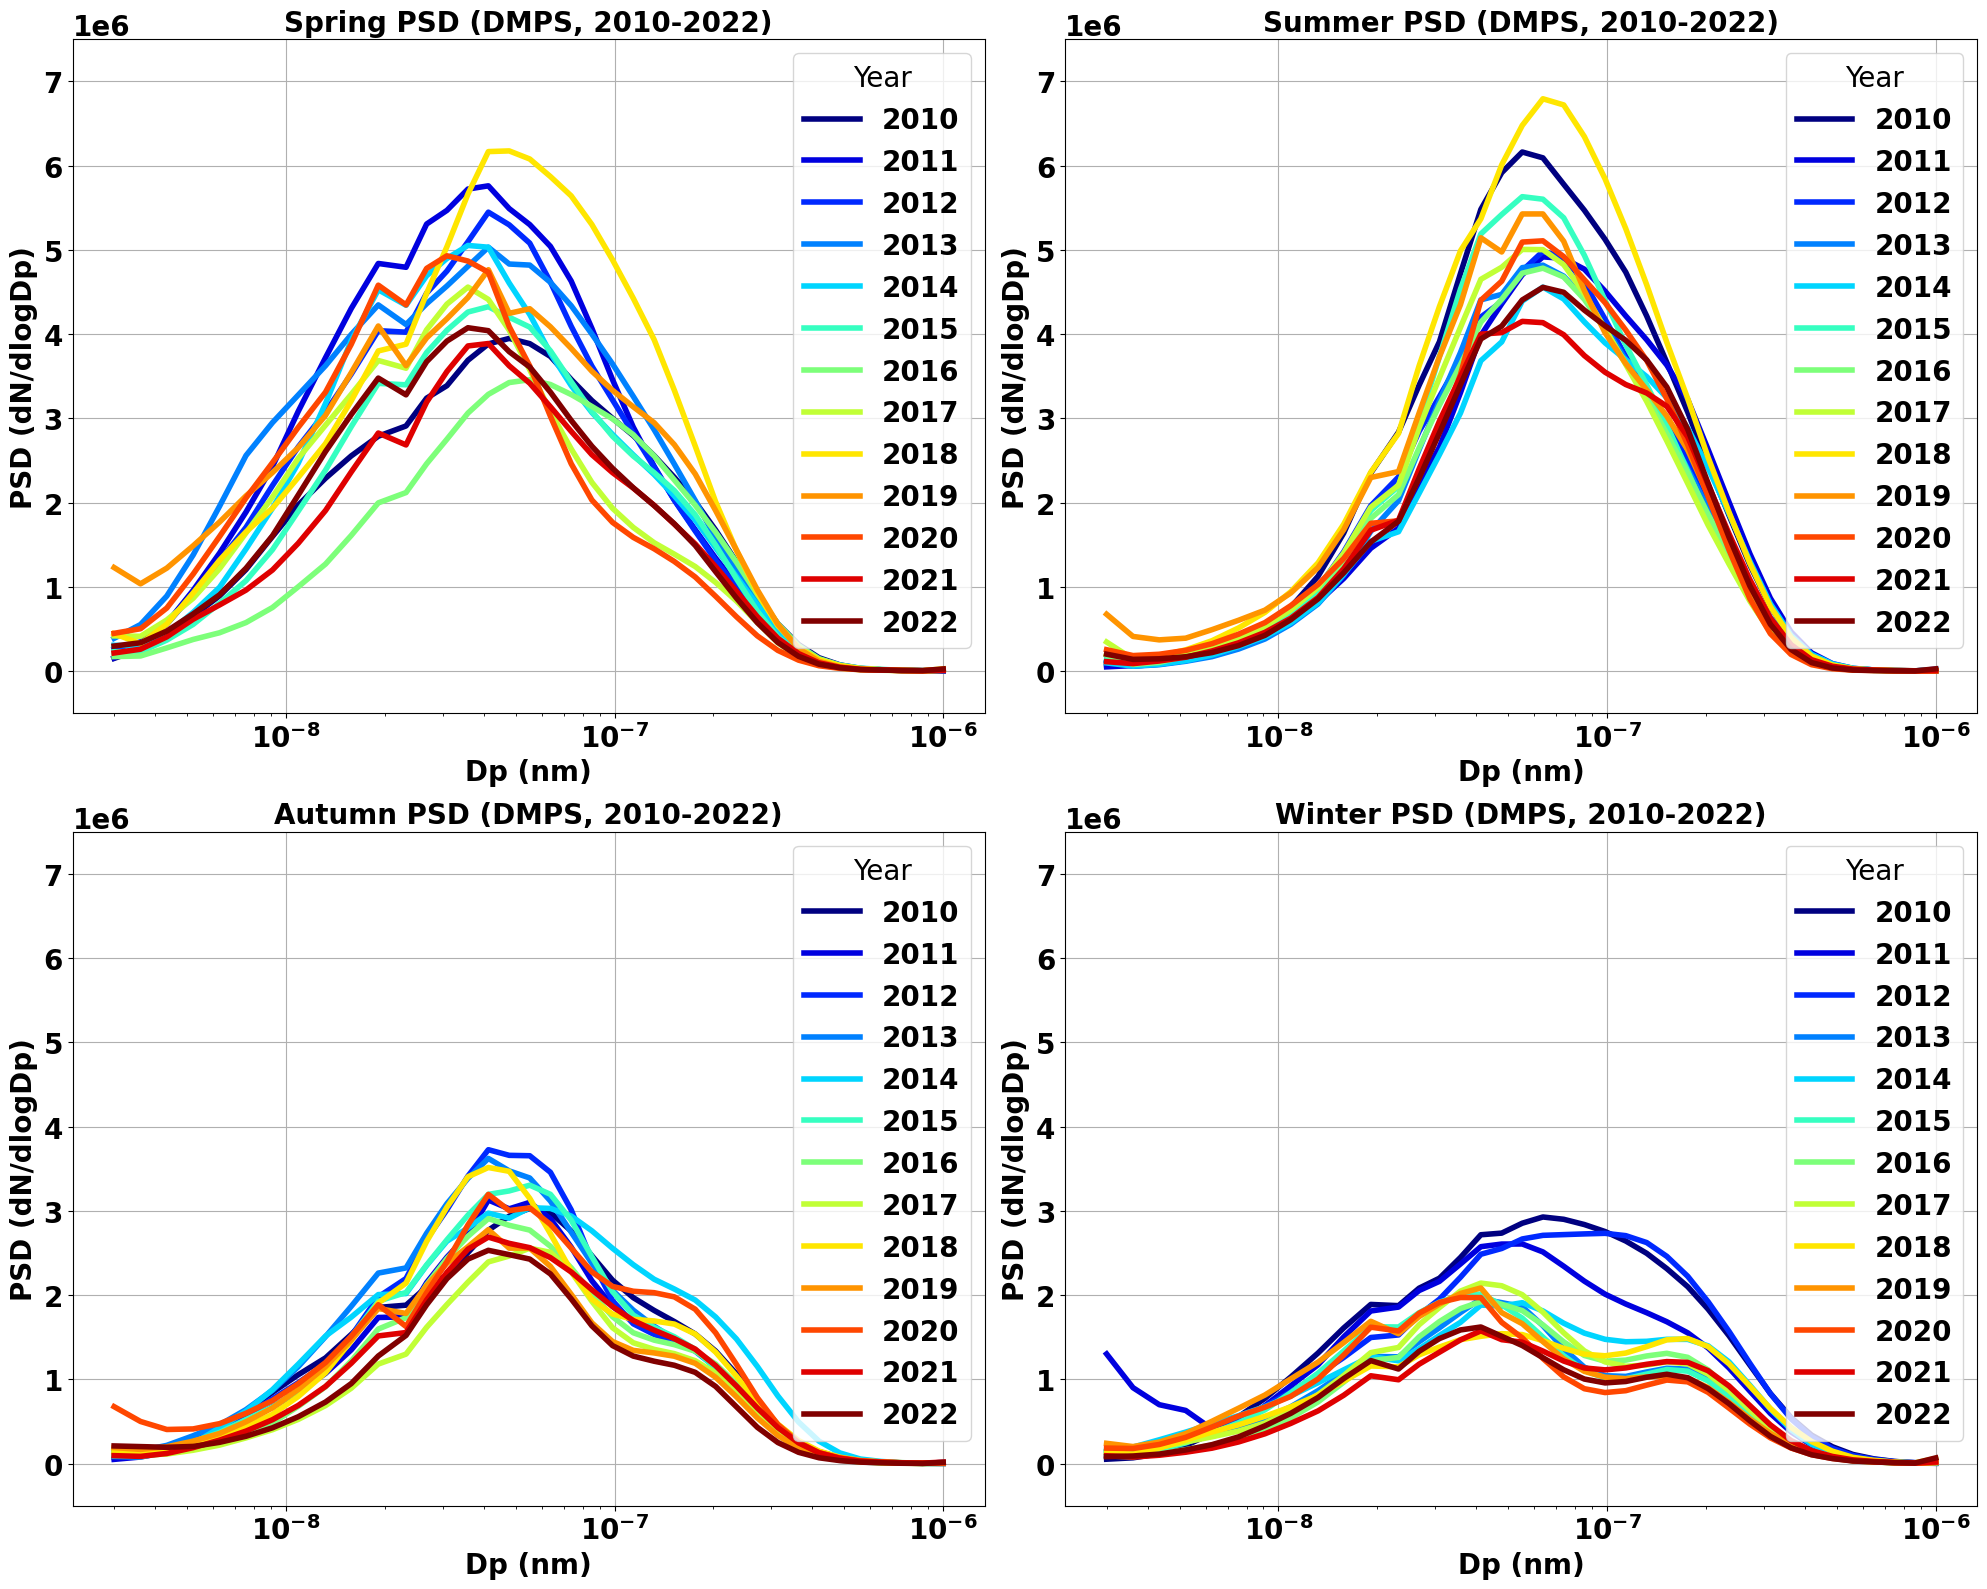

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_sum_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['Date'].dt.month.isin(months) & data['Date'].dt.year.between(2010, 2022)]
        years = sorted(season_data['Date'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['Date'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            sum_psd = yearly_data.iloc[:, 1:].sum()

            ax = axes[i]
            # Increase linewidth here
            ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))
            ax.set_title(f'{season} PSD (DMPS, 2010-2022)', fontsize=20, weight='bold')
            ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
            ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
            ax.set_ylim(y_min, y_max)  # Set custom y-axis limits based on parameters
            ax.grid(True)
            legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
            for text in legend.get_texts():
                text.set_weight('bold')

            # Adjusting the tick labels and exponent notation
            ax.tick_params(axis='both', which='major', labelsize=20)
            for label in ax.get_xticklabels() + ax.get_yticklabels():
                label.set_fontweight('bold')

            # Set the offset text (for scientific notation) to be bold and size 20
            ax.xaxis.get_offset_text().set_fontsize(20)
            ax.xaxis.get_offset_text().set_weight('bold')
            ax.yaxis.get_offset_text().set_fontsize(20)
            ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/DMPS Hourly Avg (2010-2022).xlsx'
y_min = -500000  # Set minimum y-axis value
y_max = 7500000  # Set maximum y-axis value
plot_sum_psd_by_season(file_path, y_min, y_max)

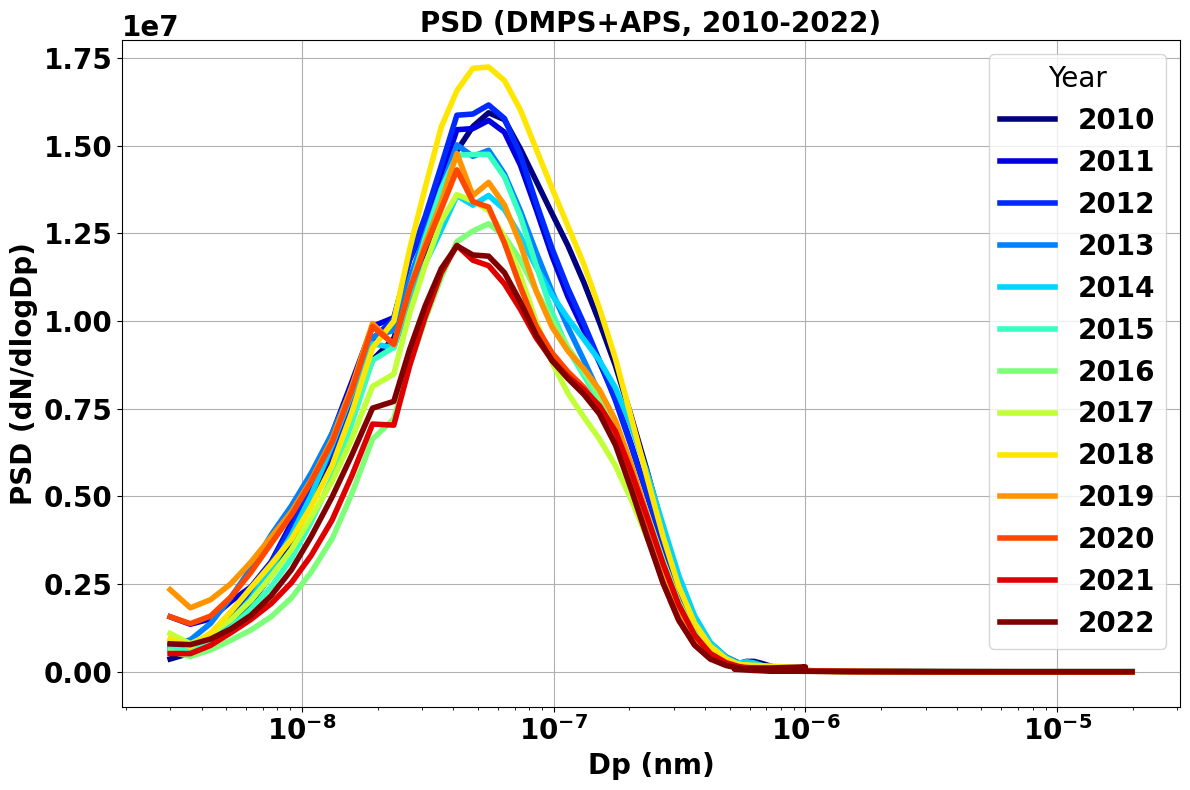

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['Date'].dt.year.between(2010, 2022)]
    years = sorted(data['Date'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year
    for year, color in zip(years, colors):
        yearly_data = data[data['Date'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        sum_psd = yearly_data.iloc[:, 1:].sum()
        
        ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('PSD (DMPS+APS, 2010-2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/2. DMPS + APS Hourly Avg (2010-2022) copy.xlsx'
y_min = -1000000  # Set minimum y-axis value
y_max = 18000000  # Set maximum y-axis value
plot_psd_by_years(file_path, y_min, y_max)

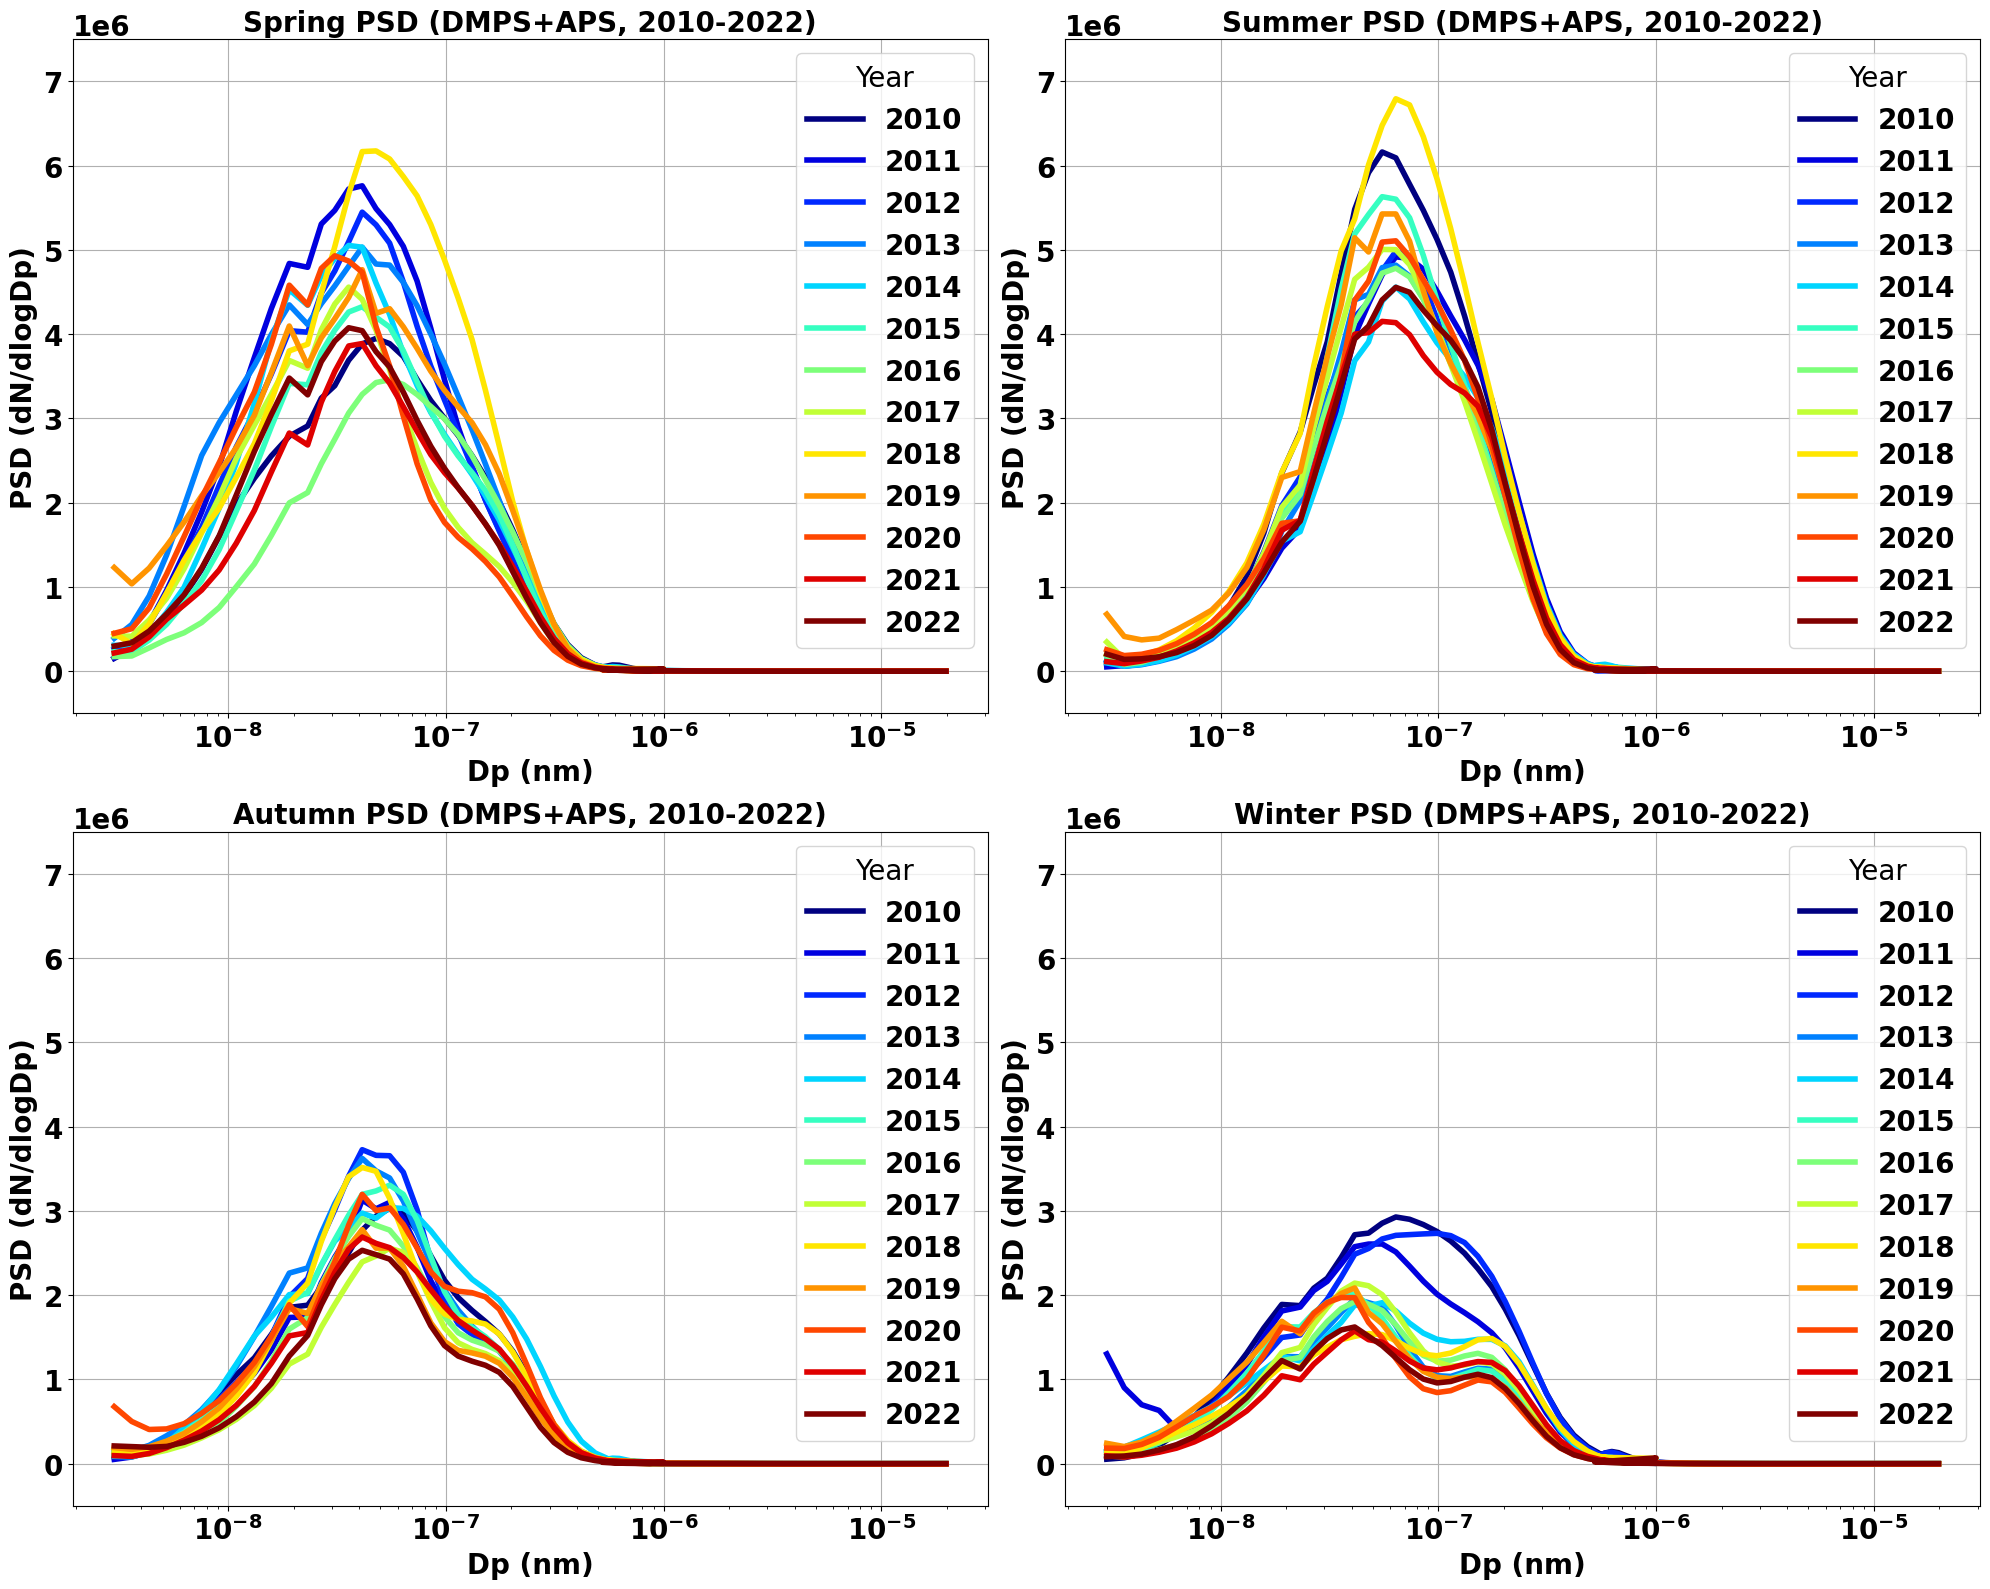

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_sum_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['Date'].dt.month.isin(months) & data['Date'].dt.year.between(2010, 2022)]
        years = sorted(season_data['Date'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['Date'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            sum_psd = yearly_data.iloc[:, 1:].sum()

            ax = axes[i]
            # Increase linewidth here
            ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))
            ax.set_title(f'{season} PSD (DMPS+APS, 2010-2022)', fontsize=20, weight='bold')
            ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
            ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
            ax.set_ylim(y_min, y_max)  # Set custom y-axis limits based on parameters
            ax.grid(True)
            legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
            for text in legend.get_texts():
                text.set_weight('bold')

            # Adjusting the tick labels and exponent notation
            ax.tick_params(axis='both', which='major', labelsize=20)
            for label in ax.get_xticklabels() + ax.get_yticklabels():
                label.set_fontweight('bold')

            # Set the offset text (for scientific notation) to be bold and size 20
            ax.xaxis.get_offset_text().set_fontsize(20)
            ax.xaxis.get_offset_text().set_weight('bold')
            ax.yaxis.get_offset_text().set_fontsize(20)
            ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/2. DMPS + APS Hourly Avg (2010-2022) copy.xlsx'
y_min = -500000  # Set minimum y-axis value
y_max = 7500000  # Set maximum y-axis value
plot_sum_psd_by_season(file_path, y_min, y_max)